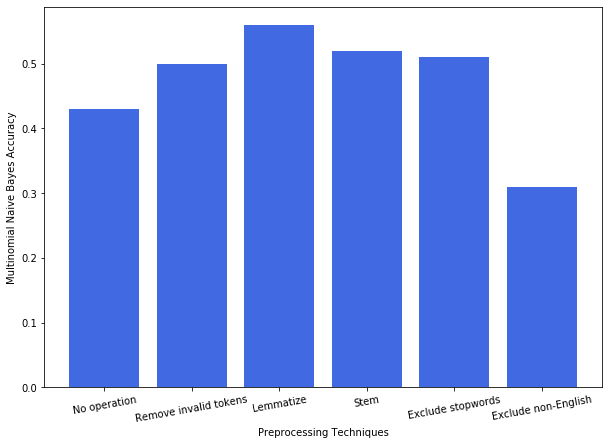

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# x_number_features = [5000,6000,8000,10000,12000,14000,15000,16000,18000,20000]
# LR = [0.48,0.49,0.51,0.525,0.54,0.5420,0.5455,0.54,0.532,0.52]
# BNB = [0.46,0.47,0.520,0.529,0.537,0.5420,0.5482,0.543,0.53,0.515]
# MNB = [0.5486,0.5570,0.5684,0.5766,0.5792,0.5823,0.5825,0.5810,0.5792,0.5790]
# LSVC = [0.51,0.53,0.535,0.54,0.548,0.560,0.5623,0.56,0.55,0.540]
# LSTM = [0.53,0.534,0.54,0.548,0.552,0.563,0.5658,0.56,0.556,0.555]

plt.figure(figsize=(10,7))
# plt.plot(x_number_features, LR, linewidth=1, label = "LR")
# plt.plot(x_number_features, BNB, linewidth=1, label = "BNB")
# plt.plot(x_number_features, MNB, linewidth=1, label = "MNB")
# plt.plot(x_number_features, LSVC, linewidth=1, label = "LSVC")
# plt.plot(x_number_features, LSTM, linewidth=1, label = "LSTM")
# plt.axvline(x=15000,color='r',linestyle="dashed")
# plt.legend(loc='lower right')
x_methods = ["No operation","Remove invalid tokens","Lemmatize",\
            "Stem","Exclude stopwords","Exclude non-English"]

MNB_acc = [0.43,0.5,0.56,0.52,0.51,0.31]
plt.bar(x_methods,MNB_acc,color='royalblue')

plt.xlabel('Preprocessing Techniques') 
plt.ylabel('Multinomial Naive Bayes Accuracy') 
plt.xticks(rotation=10)
plt.savefig("preprocessing.png")

In [1]:
import os
import re
import sys
import csv
import time
import tqdm
import nltk
import math
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import tree
from sklearn import datasets
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import *
from nltk.corpus import wordnet
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import normalize
from sklearn.feature_selection import chi2
from scipy.stats import uniform
from scipy.stats import randint
#from spellchecker import SpellChecker #need to install for some computers
import random
#from Test import * 
from sklearn.utils import shuffle
from sklearn.preprocessing import MaxAbsScaler



stops = ["a", "about", "above", "across", "after", "afterwards",\
         "again", "all", "almost", "alone", "along", "already", "also",\
         "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and",\
         "another", "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are", "as",\
         "at", "be", "became", "because", "become","becomes", "becoming", "been", "before", \
         "behind", "being", "beside", "besides", "between", "beyond", "both", "but", "by","can",\
         'cannot', "cant", "could", "couldnt", "de", "describe", "do", "done", "each", "eg",'either', "else", "enough", "etc", "even", "ever", "every", "everyone", "everything","everywhere", "except", "few", "find","for","found", "four", "from", "further", "get","give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter","hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how","however", "i", "ie", "if", "in", "indeed", "is", "it", "its", "itself", "keep", "least","less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mine", "more", "moreover","most", "mostly", "much", "must", "my", "myself", "name", "namely", "neither", "never", \
         "nevertheless", "next","no", "nobody", "none", "noone", "nor", "not", "nothing", "now","nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", \
         "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own", "part","perhaps","please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "she","should","since", "sincere","so", "some", "somehow", "someone", "something", "sometime","sometimes", "somewhere", "still", "such", "take","than", "that", "the", "their", "them", \
         "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein","thereupon", "these", "they","this", "those", "though", "through", "throughout","thru", "thus", "to", "together", "too", "toward", "towards","under", "until", "up", "upon", "us",\
         "very", "was", "we", "well", "were", "what", "whatever", "when",\
         "whence", "whenever", "where", "whereafter", "whereas", "whereby",\
         "wherein", "whereupon", "wherever", "whether", "which", "while", \
         "who", "whoever", "whom", "whose", "why", "will", "with",\
         "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves"]



feature_names = []

vectorizer = TfidfVectorizer(ngram_range=(1,1),stop_words='english',norm='l2',max_df = 0.995,min_df=2,sublinear_tf=False)
#vectorizer = CountVectorizer(ngram_range=(1,2),stop_words='english',binary=False)

corpus_train = pd.read_csv("reddit_train.csv",usecols=['comments','subreddits'],delimiter=',',sep='\s*,\s*')
corpus_test = pd.read_csv("reddit_test.csv",usecols=['comments','id'],delimiter=',',sep='\s*,\s*')
#random.shuffle(corpus_train)
#corpus_test = corpus_train["comments"]

#corpus_test = corpus_train[60000:]
# corpus_train = shuffle(corpus_train)
# corpus_test = corpus_train[:10000]
# corpus_train = corpus_train[10000:]



english_words = set(nltk.corpus.words.words()\
                    + nltk.corpus.gutenberg.words()\
                    + nltk.corpus.webtext.words()\
                    + nltk.corpus.nps_chat.words()\
                    + nltk.corpus.brown.words() + nltk.corpus.reuters.words())

#spell = SpellChecker()

# def is_english_word(x):
#     return (spell.correction(x) in english_words)
           
def misspell(x):
    if "aaa" not in x and "bbb" not in x and "ccc" not in x and "ddd" not in x \
    and "eee" not in x and "fff" not in x and "ggg" not in x and "hhh" not in x \
    and "iii" not in x and "jjj" not in x and "kkk" not in x and "lll" not in x and "mmm" not in x and "nnn" not in x \
    and "ooo" not in x and "ppp" not in x and "qqq" not in x and "rrr" not in x and "sss" not in x and "ttt" not in x \
    and "uuu" not in x and "vvv" not in x and "www" not in x and "xxx" not in x and "yyy" not in x and "zzz" not in x: #\
    #and "aa" not in x and "zz" not in x:
        return True
    else:
        return False
    

# delete_list = ["aaa" not in x,"bbb" not in x,"ccc" not in x,"ddd" not in x,"eee" not in x,"fff" not in x,"ggg" not in x,\
#                "hhh" not in x,"iii" not in x,"jjj" not in x,"kkk" not in x,"lll" not in x,"mmm" not in x,"nnn" not in x,\
#                "ooo" not in x,"ppp" not in x,"qqq" not in x,"rrr" not in x,"sss" not in x,"ttt" not in x
#                ,"uuu" not in x,"vvv" not in x,"www" not in x,"xxx" not in x,"yyy" not in x,"zzz" not in x]

# a helper function to process one comment
def preprocess_text(text): 
    text = text.lower().split()
    #stops = set(stopwords.words("english"))
#     text = [w for w in text if not w in stops and len(w) >= 3]
    text = " ".join(text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"^https?:\/\/.*[\r\n]*","", text)
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ',text)
    text = text.split()
    
    # lemmatization
    lemma = nltk.wordnet.WordNetLemmatizer()
    text = [lemma.lemmatize(word) for word in text]
    
#     # stemming
#     text = [PorterStemmer().stem(word) for word in text]
    
    text_final = []
    
    # clean all non-English words, numbers, and other weirdos, stopwords
    for x in text:
        #x = spell.correction(x)
        if x.isalpha() and len(x)<20 and len(x) > 1 and misspell(x) and x not in stops: #and is_english_word(x):
#             if len(x) >10:
#                 text_final.append(PorterStemmer().stem(x))
#             else:
            text_final.append(x)
    
    text = " ".join(text_final)
    return text


to_delete = []
chi_2 = []
pval = []
data = 0

# the major function to process the training dataset
# returns (1) a matrix of all training features x (2) a numpy array of y labels
def preprocess():
    df = corpus_train.copy()
    df['comments'] = df['comments'].map(lambda x: preprocess_text(x))
    y_train = df["subreddits"].to_numpy()
    global vectorizer
    x_train = vectorizer.fit_transform(df['comments'])
    
    print(vectorizer.get_feature_names())
    global feature_names
    feature_names = vectorizer.get_feature_names()
    featname=vectorizer.get_feature_names()
    chi_squared,pval = chi2(x_train, y_train)
    featname = pd.DataFrame(featname)
    chi_2 = pd.DataFrame(chi_squared)
    pval = pd.DataFrame(pval)
    global data
    data = pd.concat([featname,chi_2,pval],axis=1)
    data.columns = ["word","chi_squared","pval"]
    data = data.sort_values("pval",axis=0)
    return x_train, y_train

x,y = preprocess()


['aa', 'aac', 'aah', 'aaliyah', 'aan', 'aang', 'aaron', 'aatrox', 'aav', 'ab', 'aback', 'abandon', 'abandoned', 'abandoning', 'abandonment', 'abb', 'abbey', 'abbreviated', 'abbreviation', 'abby', 'abc', 'abdicate', 'abdomen', 'abdominal', 'abducted', 'abduction', 'abdul', 'abdullah', 'abe', 'abel', 'abhor', 'abhorrent', 'abhors', 'abidal', 'abide', 'abiding', 'ability', 'ablaze', 'able', 'abnormal', 'abnormality', 'abnormally', 'aboard', 'abolish', 'abolished', 'abolition', 'abolitionist', 'abomination', 'aboot', 'aboriginal', 'abort', 'abortion', 'abounds', 'abouts', 'abraham', 'abrahamic', 'abramovich', 'abrams', 'abrasive', 'abreu', 'abridged', 'abroad', 'abrupt', 'abruptly', 'absence', 'absent', 'absolute', 'absolutely', 'absolutly', 'absolve', 'absorb', 'absorbed', 'absorbing', 'absorbs', 'abstain', 'abstention', 'abstract', 'abstraction', 'absurd', 'absurdity', 'absurdly', 'abt', 'abu', 'abundance', 'abundant', 'abundantly', 'abusable', 'abuse', 'abused', 'abuser', 'abusing', 'ab

In [2]:
data

,word,chi_squared,pval
951,anime,2710.410721,0.0
17188,music,4559.115497,0.0
13845,jon,1651.283680,0.0
605,album,1781.040111,0.0
10387,gameofthrones,2086.067679,0.0
...,...,...,...
23760,sidelined,0.662105,1.0
759,amalgam,0.639951,1.0
13503,iru,0.625186,1.0
21095,readiness,0.619149,1.0


In [6]:
print(data["pval"].tolist())

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.954337878274319e-305, 3.5130766013646464e-289, 8.065240500048055e-258, 2.6129816869310887e-251, 2.5867945338864903e-233, 3.301839266071825e-228, 3.04736168852346e-225, 1.527806965980457e-224, 6.37507584094861e-210, 4.597985384764686e-205, 6.730396043742212e-205, 3.471268565932344e-199, 9.991694620613346e-198, 9.828334697428075e-194, 3.02260147343984e-193, 4.461013593176982e-193, 2.329418308232859e-186, 2.6248806805768713e-185, 3.708672921095072e-185, 4.994515201179371e-183, 7.91198918866084e-180, 5.273487902225057e-178, 2.4091620138609217e-172, 2.9760515172284864e-172, 2.404786114952544e-170, 5.975453196444451e-168, 3.616434186674819e-167, 8.830362008874093e-165, 5.244469735951404e-163, 2.0067749930781111e-162, 9.716877547970262e-156, 1.9003813150258952e-153, 8.980508164557909e-151, 4.6146203650039995e-149, 2.975480712099021e-147, 4.134508062092079e-146, 1.1345556959660885e-142, 2.560810517031895e-140, 2.426170755548095e-139, 2.234820265576452

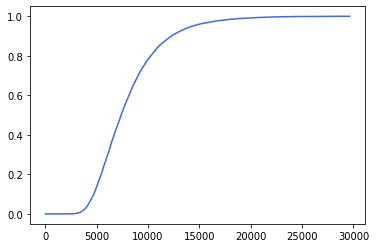

In [17]:
import matplotlib.pyplot as plt
figure1 = plt.plot(data["pval"].tolist(),color='royalblue')
plt.savefig("pvaldistribution")

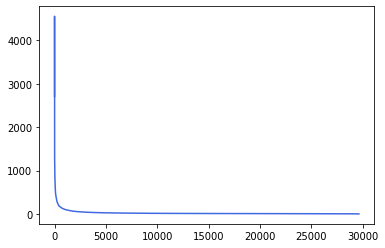

In [18]:
plt.plot(data["chi_squared"].tolist(),color='royalblue')
plt.savefig("chivaldistribution")